# Genetic Algorithm (Only to Compare)

In [5]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import time

sys.path.append(os.path.abspath("../.."))

from src.utils import plot_graph, plot_colored_graph, loading_graphs

from src.algorithm import run_genetic_algorithm
from src.genetic_operators import (tournament_selection, one_point_crossover, single_gene_mutation)


 Running Genetic Algorithm on Small Dataset
Small Graph Loaded
Nodes: 11
Edges: 20


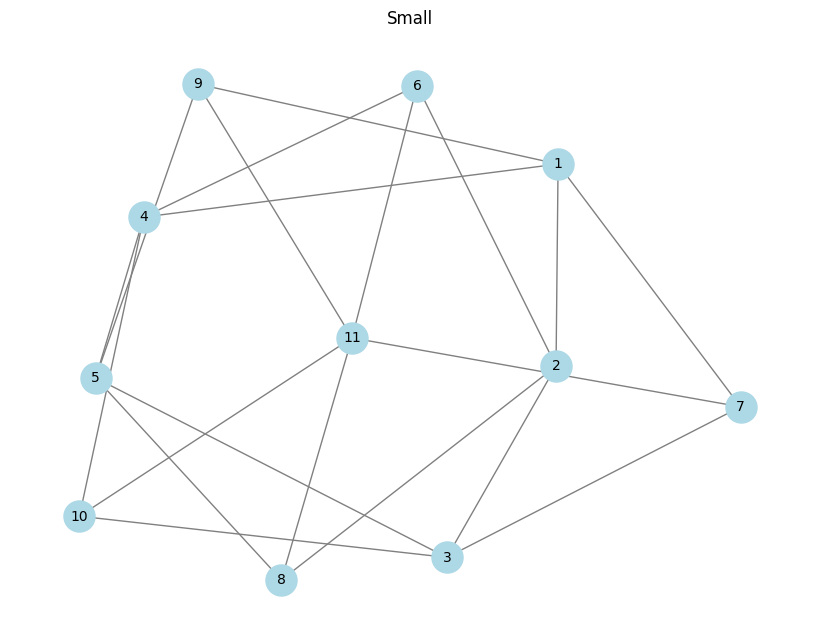

Stationary state reached at generation 116.
Time taken: 0.17 seconds

Results Table
 Best Fitness  Conflicts  Colors Used     Time
            4          0            4 0.172101


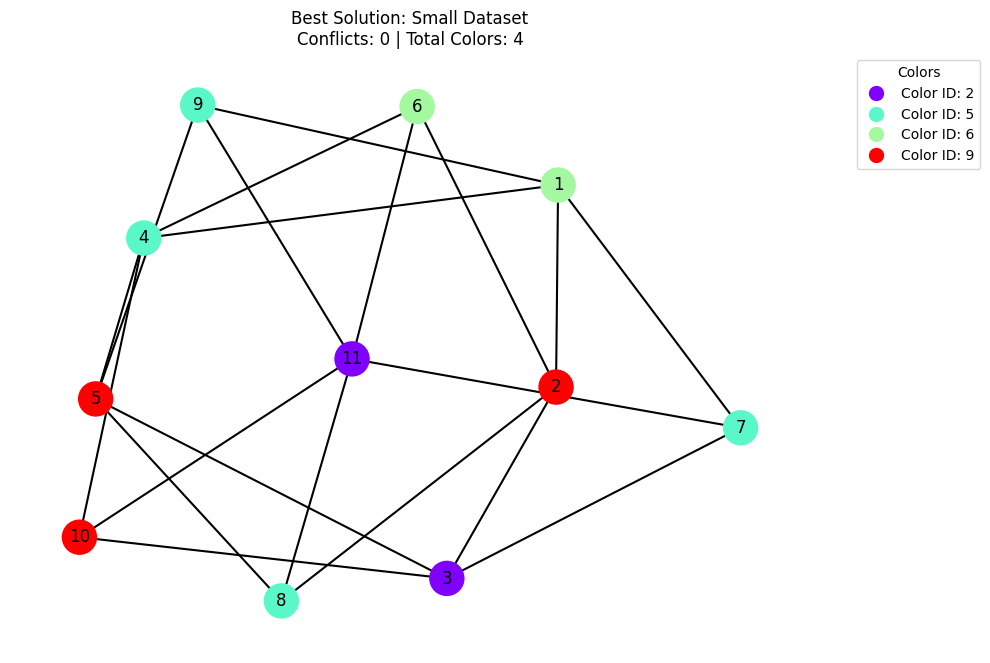

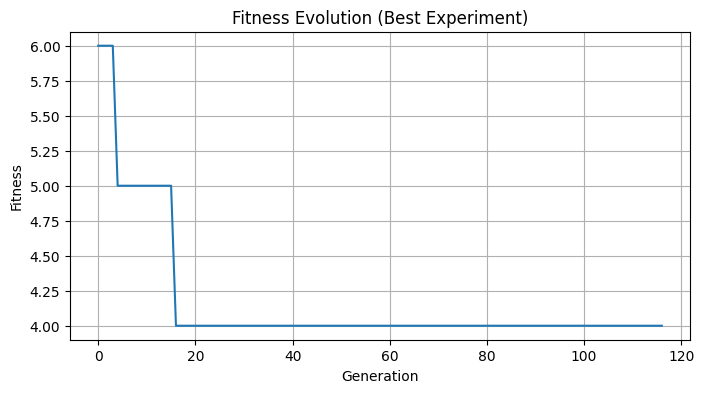


 Running Genetic Algorithm on Medium Dataset
Medium Graph Loaded
Nodes: 81
Edges: 1056


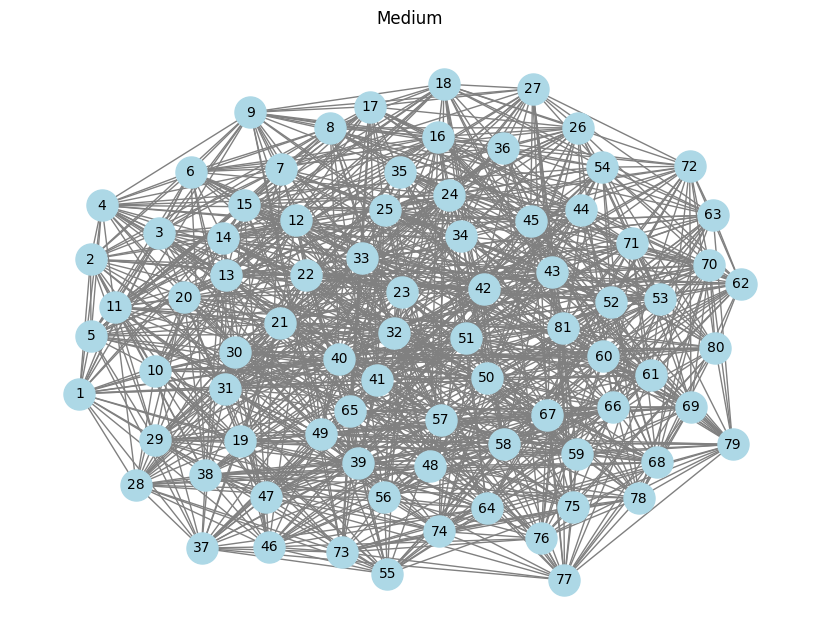

Stationary state reached at generation 484.
Time taken: 3.15 seconds

Results Table
 Best Fitness  Conflicts  Colors Used     Time
           14          0           14 3.149938


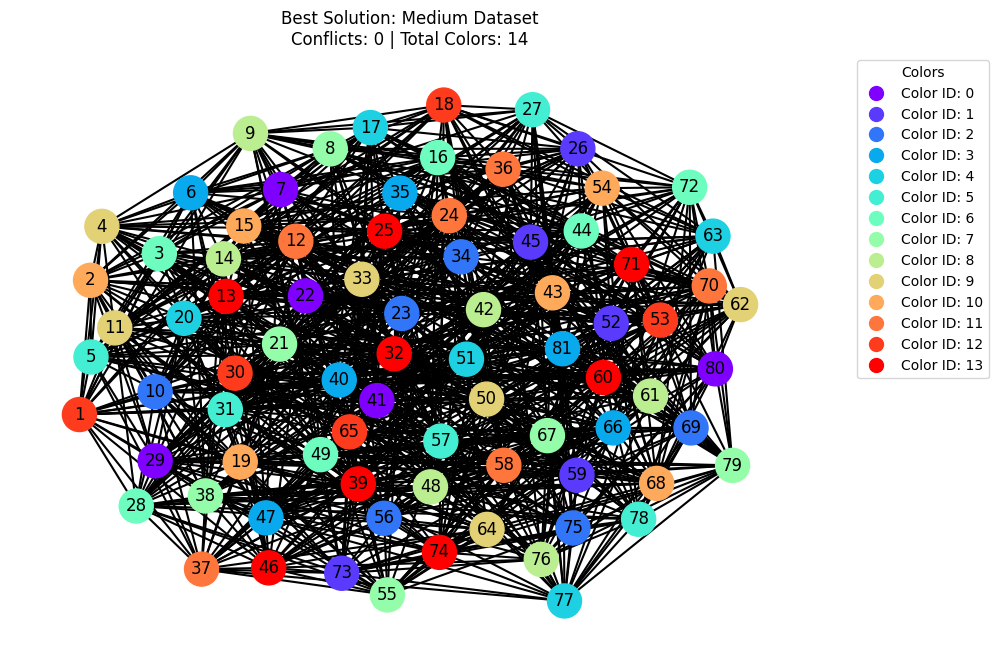

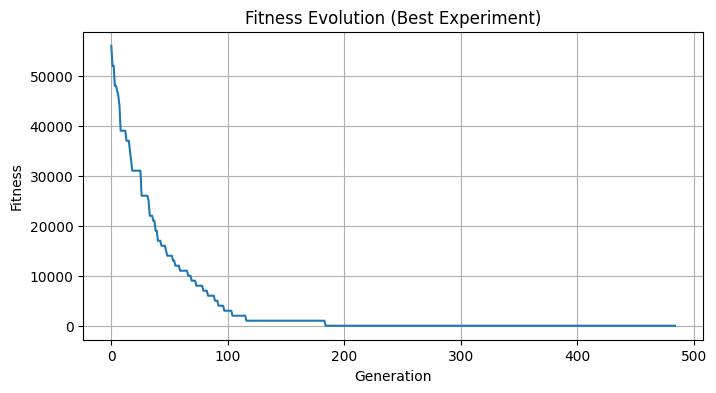


 Running Genetic Algorithm on Large Dataset
Large Graph Loaded
Nodes: 450
Edges: 8169


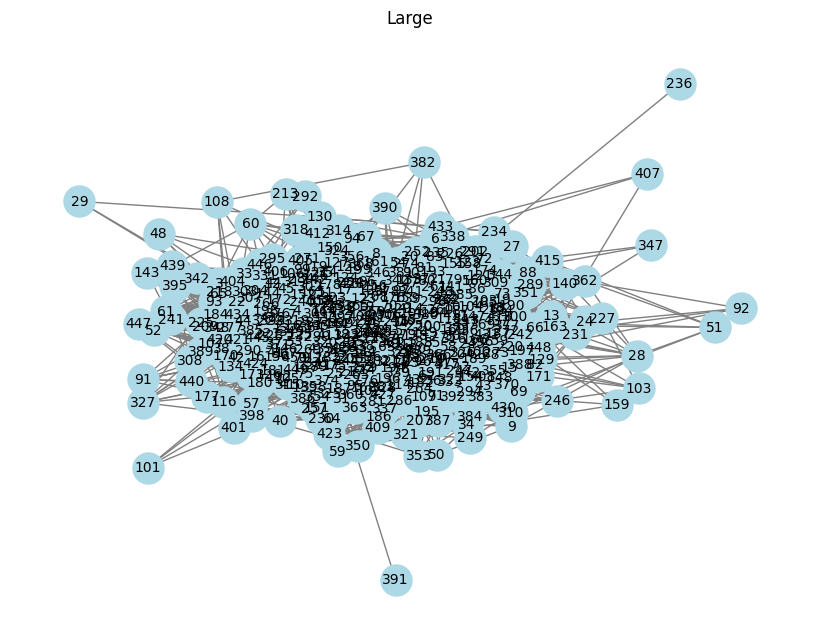

Stationary state reached at generation 1351.
Time taken: 23.71 seconds

Results Table
 Best Fitness  Conflicts  Colors Used      Time
           22          0           22 23.705736


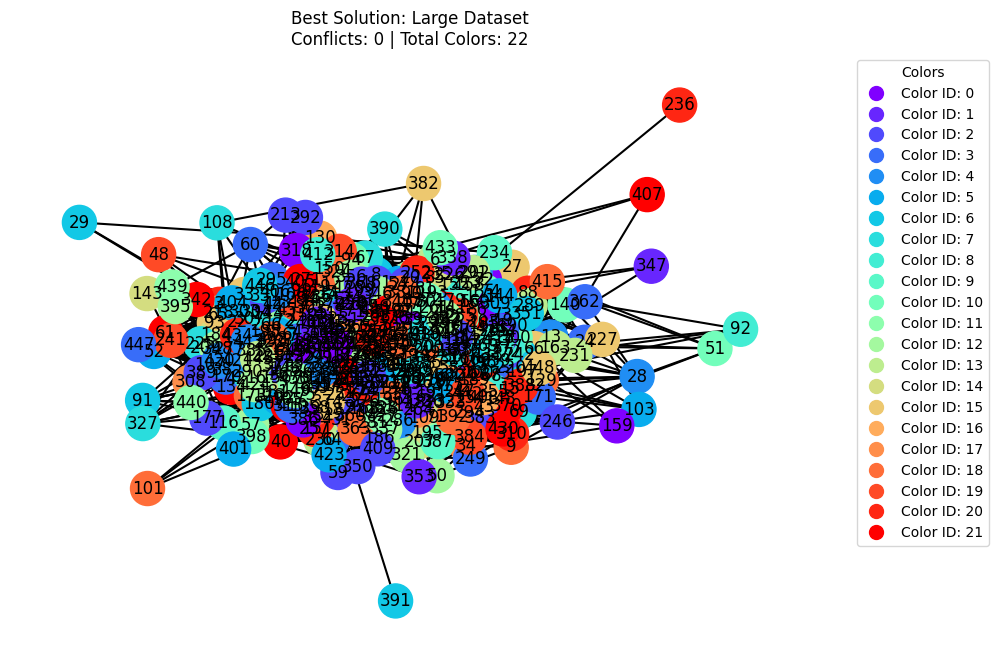

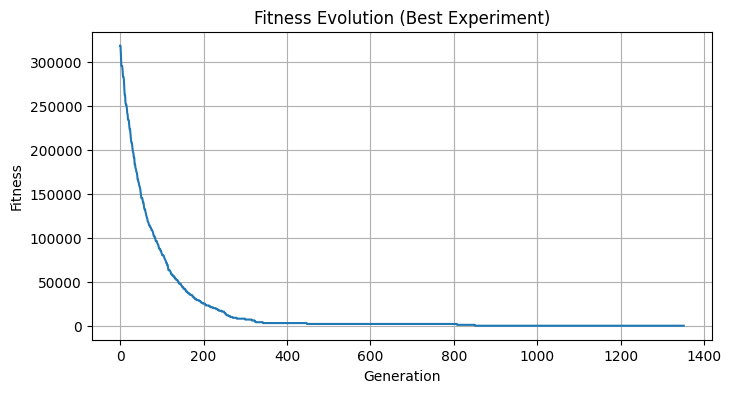

In [6]:
datasets = [
    ("../../data/myciel3.col.txt", "Small"),
    ("../../data/queen9_9.col.txt", "Medium"),
    ("../../data/le450_15b.col.txt", "Large")
]

for dataset_path, size_name in datasets:
    print(f"\n Running Genetic Algorithm on {size_name} Dataset")
    graph = loading_graphs(dataset_path, size=size_name)
    plot_graph(graph, title=size_name)

    results_table = []
    best_overall = None
    best_history = None


    if size_name == "Small":
        POP_SIZE = 100
        MAX_GEN = 500
        MAX_COLORS = 10
        ELITISM = 2
        STATIONAY_LIMIT = 100
        MUTATION_RATE = 0.1
    if size_name == "Medium":
        POP_SIZE = 400
        MAX_GEN = 1000
        MAX_COLORS = 14
        ELITISM = 5
        STATIONAY_LIMIT = 300
        MUTATION_RATE = 0.05
    if size_name == "Large":
        POP_SIZE = 500
        MAX_GEN = 2000
        MAX_COLORS = 22
        ELITISM = 10
        STATIONAY_LIMIT = 500
        MUTATION_RATE = 0.02

    start_time = time.time()
    best_ind, history = run_genetic_algorithm(
        graph=graph,
        pop_size=POP_SIZE,
        max_generations=MAX_GEN,
        max_colors=MAX_COLORS,
        selection_func=tournament_selection,
        crossover_func=one_point_crossover,
        mutation_func=single_gene_mutation,
        mutation_rate=None,
        elitism_count=ELITISM,
        stationary_limit=STATIONAY_LIMIT
    )
    end_time = time.time()
    duration = end_time - start_time

    print(f"Time taken: {duration:.2f} seconds")

    results_table.append({
        "Best Fitness": best_ind.fitness,
        "Conflicts": best_ind.conflicts,
        "Colors Used": len(set(best_ind.genes)),
        "Time": duration
    })

    if best_overall is None or best_ind.fitness < best_overall.fitness:
        best_overall = best_ind
        best_history = history

    df = pd.DataFrame(results_table)
    print("\nResults Table")
    print(df.to_string(index=False))

    if best_overall is not None:
        plot_colored_graph(graph, best_overall, title=f"Best Solution: {size_name} Dataset")

        plt.figure(figsize=(8, 4))
        plt.plot(best_history)
        plt.title("Fitness Evolution (Best Experiment)")
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.grid(True)
        plt.show()
    

